The most of contents borrowed from the book 『Python Data Science Handbook: Essential Tools for Working with Data, Jake VanderPlas, O'REILLY, 2017』. I have just added somewhat object-oriented or matlab style codes.

# Customizing Ticks

### Major and Minor Ticks

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

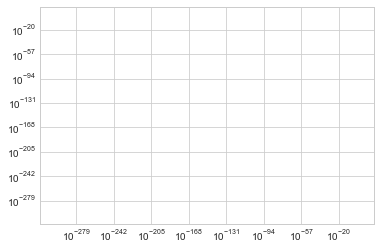

In [6]:
ax = plt.axes(xscale = 'log', yscale='log')

In [7]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [8]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

### Hiding Ticks or Labels

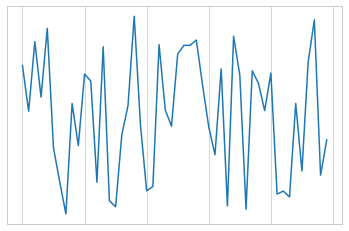

In [9]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

### Grid of Images
- Notice that each image has own axes,and we've set the locators to null because the tick values (pixel number in this case) do not convey relevant information for this particular visualization.

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\actruce\scikit_learn_data


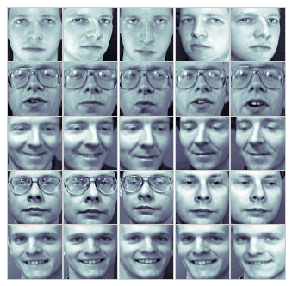

In [10]:
fig, ax = plt.subplots(5, 5, figsize=(5,5))
fig.subplots_adjust(hspace=0, wspace=0)

# Get some face data from scikit-learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10*i + j], cmap='bone')

### Reducing or Increasing the Number of Ticks

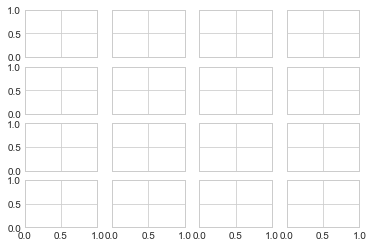

In [11]:
fig, ax = plt.subplots(4, 4, sharex = True, sharey = True)

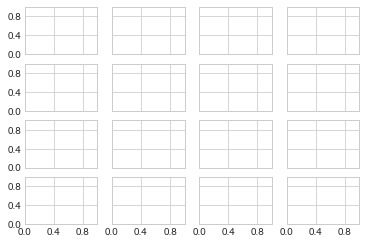

In [13]:
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

### Fancy Tick Formats

(0, 9.42477796076938)

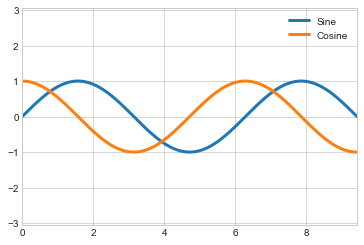

In [14]:
# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3*np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3*np.pi)

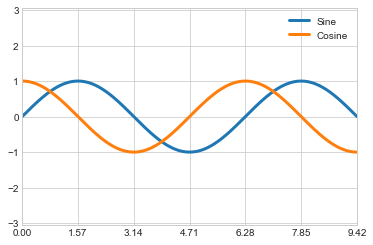

In [17]:
# 1. To space the ticks and grid lines in multiples of pi.
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

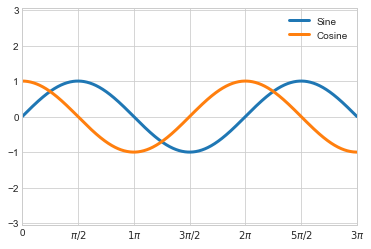

In [20]:
# 2. To fix decimal representation, use plt.FuncFormatter
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2*value / np.pi))
    if N == 0:
        return '0'
    elif N == 1:
        return r'$\pi/2$'
    elif N % 2 > 0:
        return r'${}\pi/2$'.format(N)
    else:
        return r'${}\pi$'.format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig